In First Step , we Import all Required Libraries for Data Maniplation and Visulization.
Then we Load The Dataset.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
file_path = "arabica_ratings_raw.csv"
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Quakers,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
1,1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
2,2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,...,0.0,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN
3,3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,...,0.0,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN
4,4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,0.0,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN


In this step we cleaning the Data by removing missing value 

In [14]:
#Cleaning the Data
missing = df.isna().sum().sort_values(ascending=False)
print("Missing Value:\n")
print(missing.head(15))  

Missing Value:

NA.3                                1312
NA.2                                1312
view_certificate_1                  1312
view_certificate_2                  1312
Cupping Protocol and Descriptors    1312
View Green Analysis Details         1312
Request a Sample                    1312
Unnamed: 51                         1312
Notes                               1307
Lot Number                          1042
Farm Name                            356
Mill                                 308
Color                                268
Producer                             230
Altitude                             218
dtype: int64


Keep only the most relevent columns for model training and analyses 

In [18]:
#Importents
selected_columns = [
    "Aroma", "Flavor", "Aftertaste", "Acidity", 
    "Body", "Balance", "Uniformity", "Clean Cup", 
    "Sweetness", "quality_score", "Country of Origin", 
    "Processing Method"
]
df_selected = df[selected_columns].dropna()
df_selected.head()

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,quality_score,Country of Origin,Processing Method
0,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,90.58,Ethiopia,Washed / Wet
1,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,89.92,Ethiopia,Washed / Wet
3,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,89.00,Ethiopia,Natural / Dry
4,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,88.83,Ethiopia,Washed / Wet
5,8.58,8.42,8.42,8.50,8.25,8.33,10.0,10.0,10.0,88.83,Brazil,Natural / Dry


Compare the avarage Quality score by country 

Country of Origin
United States       85.978750
Papua New Guinea    85.750000
Japan               84.670000
Ethiopia            84.542889
Kenya               84.309600
Uganda              84.051923
Ecuador             83.830000
Panama              83.707500
Colombia            83.106557
El Salvador         83.052857
Name: quality_score, dtype: float64


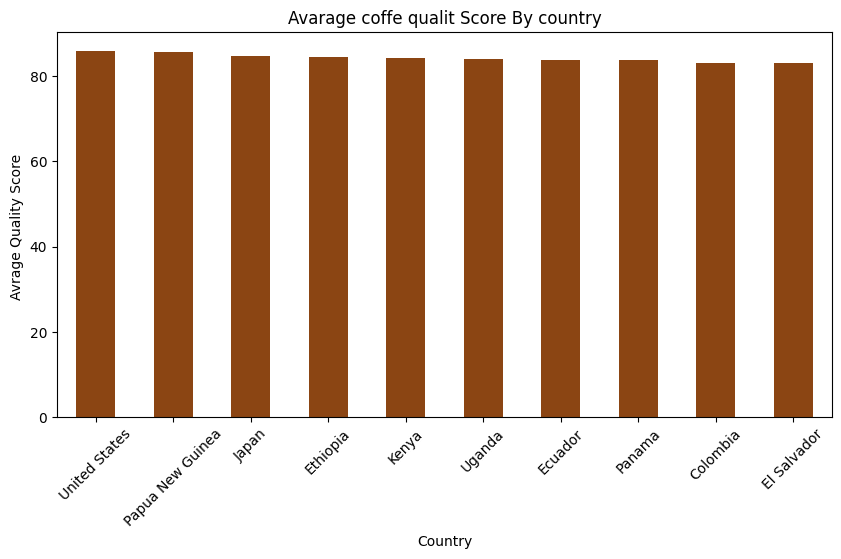

In [16]:
#Avarage 
country_quality = (
    df.groupby("Country of Origin")["quality_score"]
    .mean()
    .sort_values(ascending=False)
)

#Top 10
print(country_quality.head(10))
#Differences
plt.figure(figsize=(10,5))
country_quality.head(10).plot(kind='bar', color='#8B4513')
plt.title("Avarage coffe qualit Score By country")
plt.xlabel("Country")
plt.ylabel("Avrage Quality Score ")
plt.xticks(rotation=45)
plt.show()

Compare the avarage Quality score by processig Method 

Processing Method
Pulped natural / honey       82.807857
Semi-washed / Semi-pulped    82.633571
Natural / Dry                82.354143
Washed / Wet                 81.964618
Name: quality_score, dtype: float64


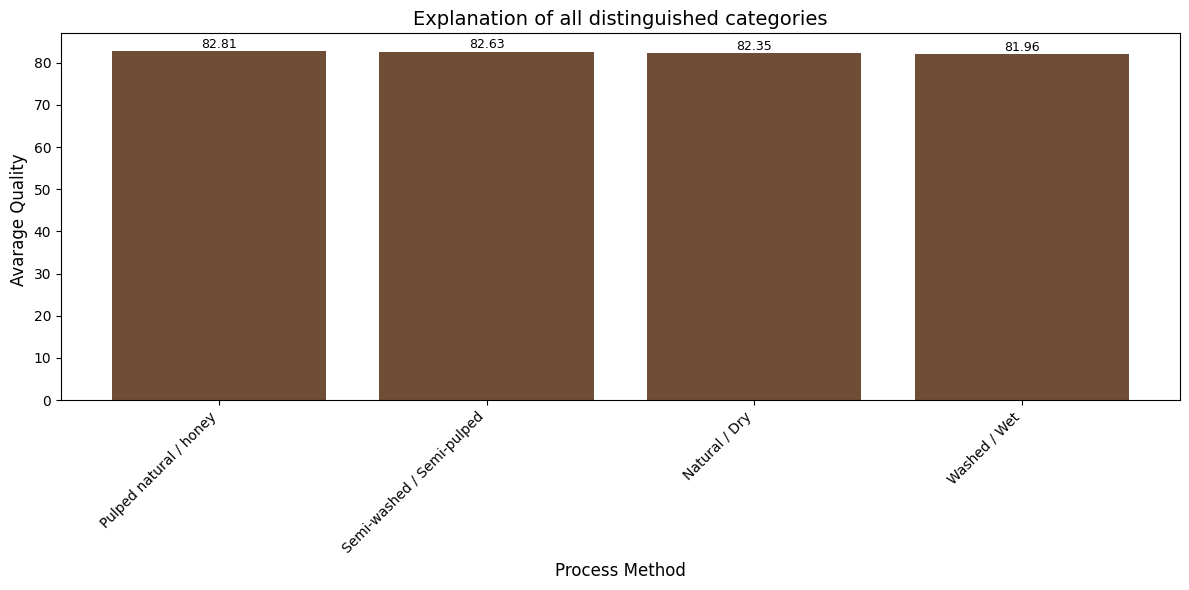

In [25]:

process_quality = (
    df[df["Processing Method"] != "Other"]
    .groupby("Processing Method")["quality_score"]
    .mean()
    .sort_values(ascending=False)
)
print(process_quality)
plt.figure(figsize=(12,6))
bars = plt.bar(process_quality.index, process_quality.values, color='#6F4E37')
plt.title("Explanation of all distinguished categories", fontsize=14)
plt.xlabel("Process Method", fontsize=12)
plt.ylabel("Avarage Quality ", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Visualize how each key attribute relates to the overall coffee quality.

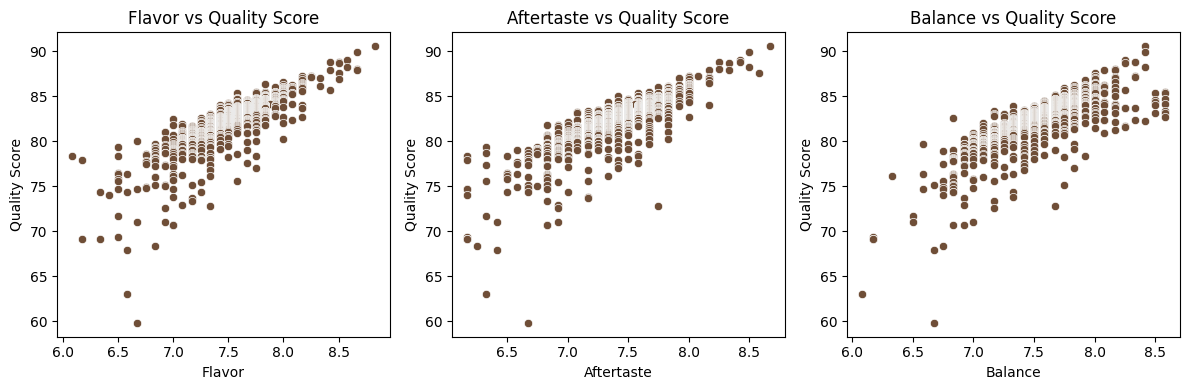

In [10]:
features = ["Flavor", "Aftertaste", "Balance"]
plt.figure(figsize=(12,4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df_selected, x=feature, y="quality_score", color="#6F4E37")
    plt.title(f"{feature} vs Quality Score")
    plt.xlabel(feature)
    plt.ylabel("Quality Score")

plt.tight_layout()
plt.show()

Train the baseline model. ( Linear Regression & Decision Tree) to predict coffee Quality 

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df[["Flavor", "Aftertaste", "Balance"]]
y = df["quality_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("LR Results:")
print(f"MSE: {lr_mse:.4f}")
print(f"R² Score: {lr_r2:.4f}\n")
#Decision Tree 
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

print("DT Results:")
print(f"MSE: {dt_mse:.4f}")
print(f"R² Score: {dt_r2:.4f}")

LR Results:
MSE: 2.1149
R² Score: 0.7449

DT Results:
MSE: 4.7785
R² Score: 0.4236


Model performance Coparsion 

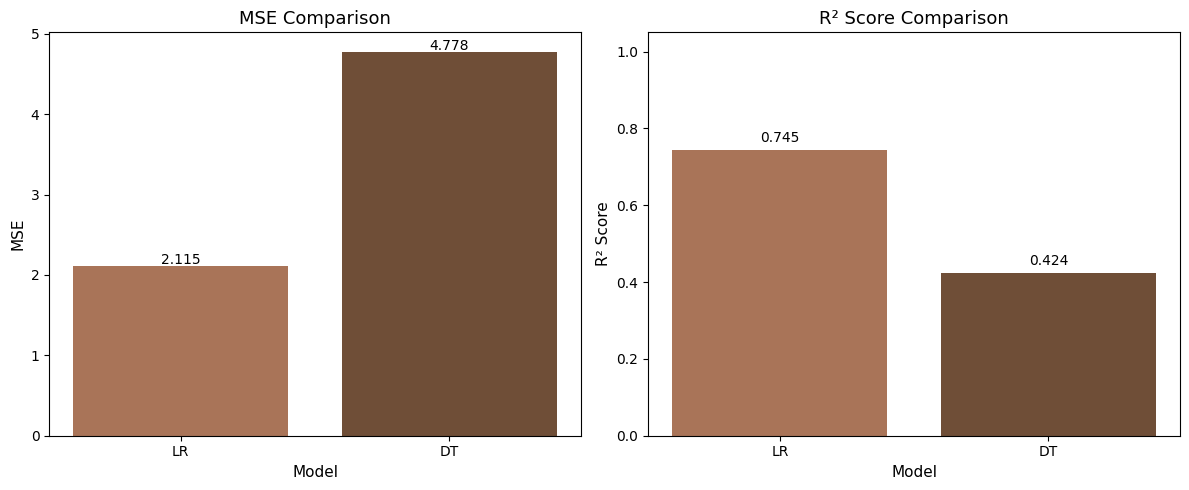

In [30]:
import matplotlib.pyplot as plt
import numpy as np

models = ["LR", "DT"]
mse_values = [lr_mse, dt_mse]
r2_values = [lr_r2, dt_r2]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(models, mse_values, color=["#A97458", "#6F4E37"])
axes[0].set_title("MSE Comparison", fontsize=13)
axes[0].set_ylabel("MSE", fontsize=11)
axes[0].set_xlabel("Model", fontsize=11)

for i, v in enumerate(mse_values):
    axes[0].text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10)

axes[1].bar(models, r2_values, color=["#A97458", "#6F4E37"])
axes[1].set_title("R² Score Comparison", fontsize=13)
axes[1].set_ylabel("R² Score", fontsize=11)
axes[1].set_xlabel("Model", fontsize=11)
axes[1].set_ylim(0, 1.05)
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Convert numerical quality Score into Labels ( High ,Medium ,Low)

In [37]:
import pandas as pd
import numpy as np

df_class = df.copy()
def categorize_quality(score):
    if score >= 87:
        return "High"
    elif score >= 85:
        return "Medium"
    else:
        return "Low"
df_class["Quality_Label"] = df_class["quality_score"].apply(categorize_quality)

print(df_class["Quality_Label"].value_counts())
df_class.head()

Quality_Label
Low       1206
Medium      81
High        25
Name: count, dtype: int64


,Unnamed: 0,quality_score,view_certificate_1,view_certificate_2,Cupping Protocol and Descriptors,View Green Analysis Details,Request a Sample,Species,Owner,Country of Origin,...,Color,Category Two Defects,NA.3,Expiration,Certification Body,Certification Address,Certification Contact,Unnamed: 51,Notes,Quality_Label
0,0,90.58,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,Green,0 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN,High
1,1,89.92,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,Green,1 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN,High
2,2,89.75,NaN,NaN,NaN,NaN,NaN,Arabica,Grounds for Health Admin,Guatemala,...,NaN,0 full defects,NaN,"May 31st, 2011",Specialty Coffee Association,"117 W 4th St, Suite 300 Santa Ana, CA 92701",Chris Buck - (562) 624-4100,NaN,NaN,High
3,3,89.00,NaN,NaN,NaN,NaN,NaN,Arabica,Yidnekachew Dabessa,Ethiopia,...,Green,2 full defects,NaN,"March 25th, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN,High
4,4,88.83,NaN,NaN,NaN,NaN,NaN,Arabica,metad plc,Ethiopia,...,Green,2 full defects,NaN,"April 3rd, 2016",METAD Agricultural Development plc,"BAWA Center, 3rd Floor (Gerji), Addis Ababa, E...","Aman Adinew (Emebet Dinku) - +251-116-292534, ...",NaN,NaN,High


Decision Tree Classification & Feature Importance

Accuracy: 0.96

Classification :

              precision    recall  f1-score   support

        High       0.80      0.80      0.80         5
         Low       0.97      1.00      0.98       242
      Medium       0.80      0.50      0.62        16

    accuracy                           0.96       263
   macro avg       0.86      0.77      0.80       263
weighted avg       0.96      0.96      0.96       263



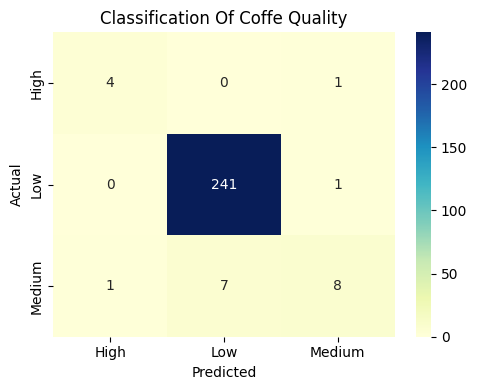

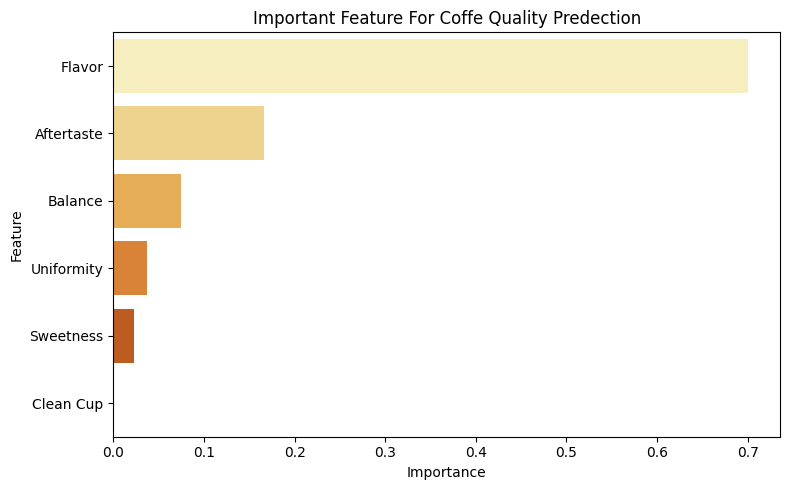

In [43]:
# َQuality Decision Tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Features Sellection
X = df_class[["Flavor", "Aftertaste", "Balance", "Uniformity", "Sweetness", "Clean Cup"]]
y = df_class["Quality_Label"]

#80% Train 20% Test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# Train The Model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  
clf.fit(X_train, y_train)
# Make Predictions
y_pred = clf.predict(X_test)
#Evaluate The Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")

print("Classification :\n")
print(classification_report(y_test, y_pred))

#Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap="YlGnBu",
    xticklabels=clf.classes_,
    yticklabels=clf.classes_
)
plt.title("Classification Of Coffe Quality")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

import numpy as np

feature_importance = clf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=features, hue=features, palette="YlOrBr", legend=False)
plt.title("Important Feature For Coffe Quality Predection")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

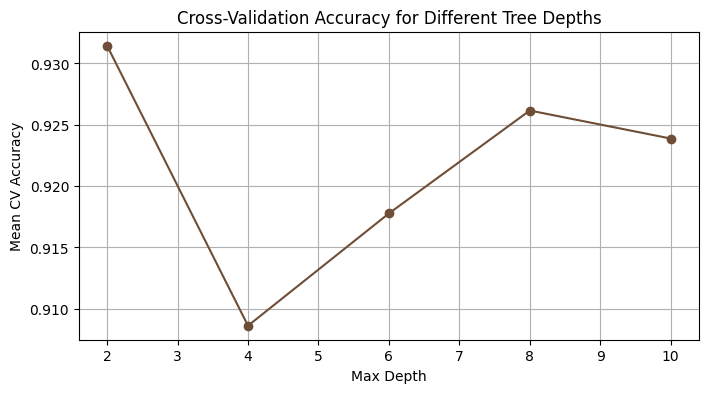

✅ Best max_depth based on cross-validation: 2


In [44]:
from sklearn.model_selection import cross_val_score

# Test different tree depths to find the optimal one
depths = [2, 4, 6, 8, 10]
cv_scores = []

for d in depths:
    clf_temp = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(clf_temp, X, y, cv=5)  # 5-fold cross validation
    cv_scores.append(scores.mean())

plt.figure(figsize=(8,4))
plt.plot(depths, cv_scores, marker='o', color='#6F4E37')
plt.title("Cross-Validation Accuracy for Different Tree Depths")
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

best_depth = depths[np.argmax(cv_scores)]
print(f"✅ Best max_depth based on cross-validation: {best_depth}")

KNN Accuracy: 0.97
Naive Bayes Accuracy: 0.84


/var/folders/12/j2znvvpx1n5b1gsk1q1skxqh0000gn/T/ipykernel_39875/3357425055.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="YlOrBr")


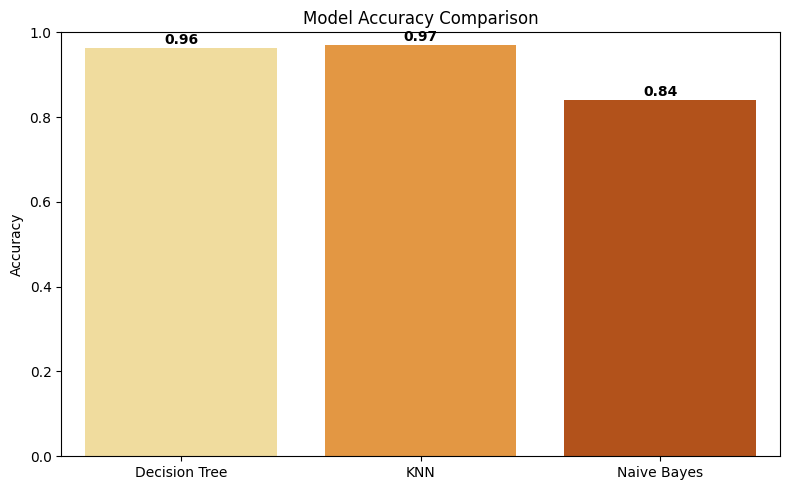

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# ===============================
# K-Nearest Neighbours (KNN)
# ===============================
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune k later
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_acc:.2f}")

# ===============================
# Naive Bayes
# ===============================
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")

# ===============================
# Compare All Models
# ===============================
models = ["Decision Tree", "KNN", "Naive Bayes"]
accuracies = [accuracy, knn_acc, nb_acc]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=accuracies, palette="YlOrBr")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

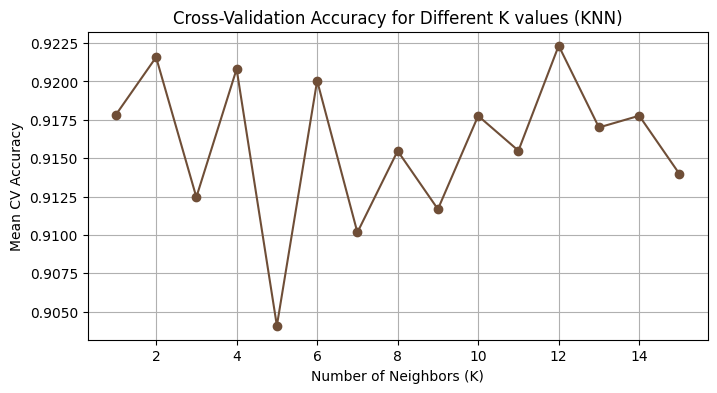

✅ Best K value based on cross-validation: 12


In [46]:
from sklearn.model_selection import cross_val_score

# Test different values of K
k_values = range(1, 16)
cv_scores_knn = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X, y, cv=5)
    cv_scores_knn.append(scores.mean())

plt.figure(figsize=(8,4))
plt.plot(k_values, cv_scores_knn, marker='o', color='#6F4E37')
plt.title("Cross-Validation Accuracy for Different K values (KNN)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(cv_scores_knn)]
print(f"✅ Best K value based on cross-validation: {best_k}")

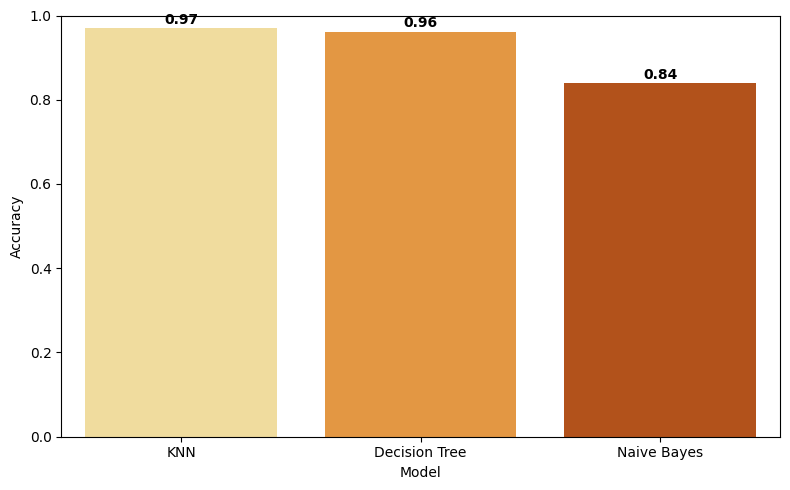

In [ ]:
#  Summary
summary_data = {
    "Model": ["Decision Tree", "KNN", "Naive Bayes"],
    "Accuracy": [accuracy, knn_acc, nb_acc]
}

summary_df = pd.DataFrame(summary_data).sort_values(by="Accuracy", ascending=False)


# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=summary_df, hue="Model", palette="YlOrBr", legend=False)

plt.ylim(0, 1)
for i, v in enumerate(summary_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

Model Performance Analysis

The results show that the K-Nearest Neighbours (KNN) model had the highest accuracy at around 97%. This was just above the Decision Tree model, which reached about 96%. The Naive Bayes classifier had the lowest accuracy at about 84%.

The Naive Bayes model assumes that features are independent, but this is not the case for this dataset. Many sensory attributes are correlated, as shown in the correlation analysis. This explains why Naive Bayes had lower accuracy.

The Decision Tree model also performed well and was easy to interpret. It showed which features, especially Flavor and Balance, were most important for performance. To improve results in the future, it may help to try ensemble methods like Random Forest or Gradient Boosting. Feature scaling and normalization could also make KNN work even better.